In [13]:
import os
from google.colab import drive
import sys
import torch

In [14]:
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
sys.path.append('/content/drive/My Drive')
from fcunet_utils import Dataset_2d, FCUnet

In [29]:
dataset = Dataset_2d(data_dir='/content/drive/My Drive/generated_data_2d_128')

In [30]:
fcunet = FCUnet(dataset)

In [31]:
fcunet.prepare_data()

In [38]:
trainer = pl.Trainer(max_epochs=10)
trainer.fit(fcunet)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name  | Type      | Params
-------------------------------------
0  | l1_3  | ConvBlock | 18.9 K
1  | l1_7  | ConvBlock | 37.1 K
2  | l2_4  | ConvBlock | 92.5 K
3  | l1_8  | ConvBlock | 9.3 K 
4  | l2_5  | ConvBlock | 37.1 K
5  | l1_11 | ConvBlock | 46.2 K
6  | l2_8  | ConvBlock | 129 K 
7  | l3_4  | ConvBlock | 406 K 
8  | l1_12 | ConvBlock | 9.3 K 
9  | l2_9  | ConvBlock | 37.1 K
10 | l1_15 | ConvBlock | 83.1 K
11 | l2_12 | ConvBlock | 203 K 
12 | l1_16 | ConvBlock | 9.3 K 
13 | l1_19 | ConvBlock | 46.2 K
14 | out   | ConvBlock | 291   
-------------------------------------
1.2 M     Trainable params
0         Non-trai

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [39]:
def plot_results(seismic):
  fig, axes = plt.subplots(1, 3, figsize=(24, 8))

  k = fcunet.forward(seismic[0].unsqueeze(0))
  axes[0].imshow(k.detach().numpy()[0, 0, :, :], cmap='gray')
  axes[0].set_title("Output of FCUnet")
  axes[0].axis('off')

  k = seismic[1].unsqueeze(0)
  axes[1].imshow(k.detach().numpy()[0, 0, :, :], cmap='gray')
  axes[1].set_title("Target Seismic")
  axes[1].axis('off')

  k = seismic[0].unsqueeze(0)
  axes[2].imshow(k.detach().numpy()[0, 0, :, :], cmap='gray')
  axes[2].set_title("Input Seismic")
  axes[2].axis('off')

  plt.show()


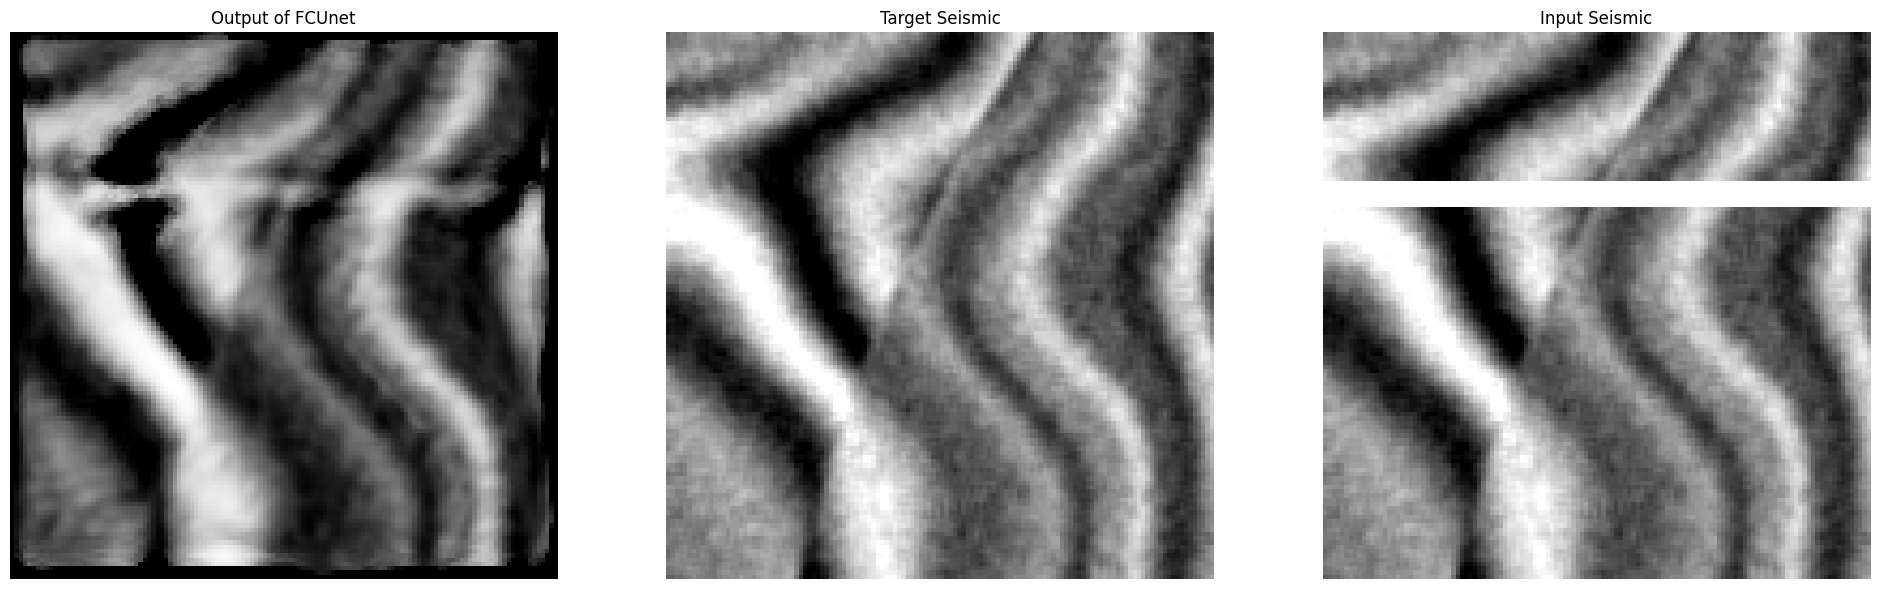

In [40]:
plot_results(dataset[0])

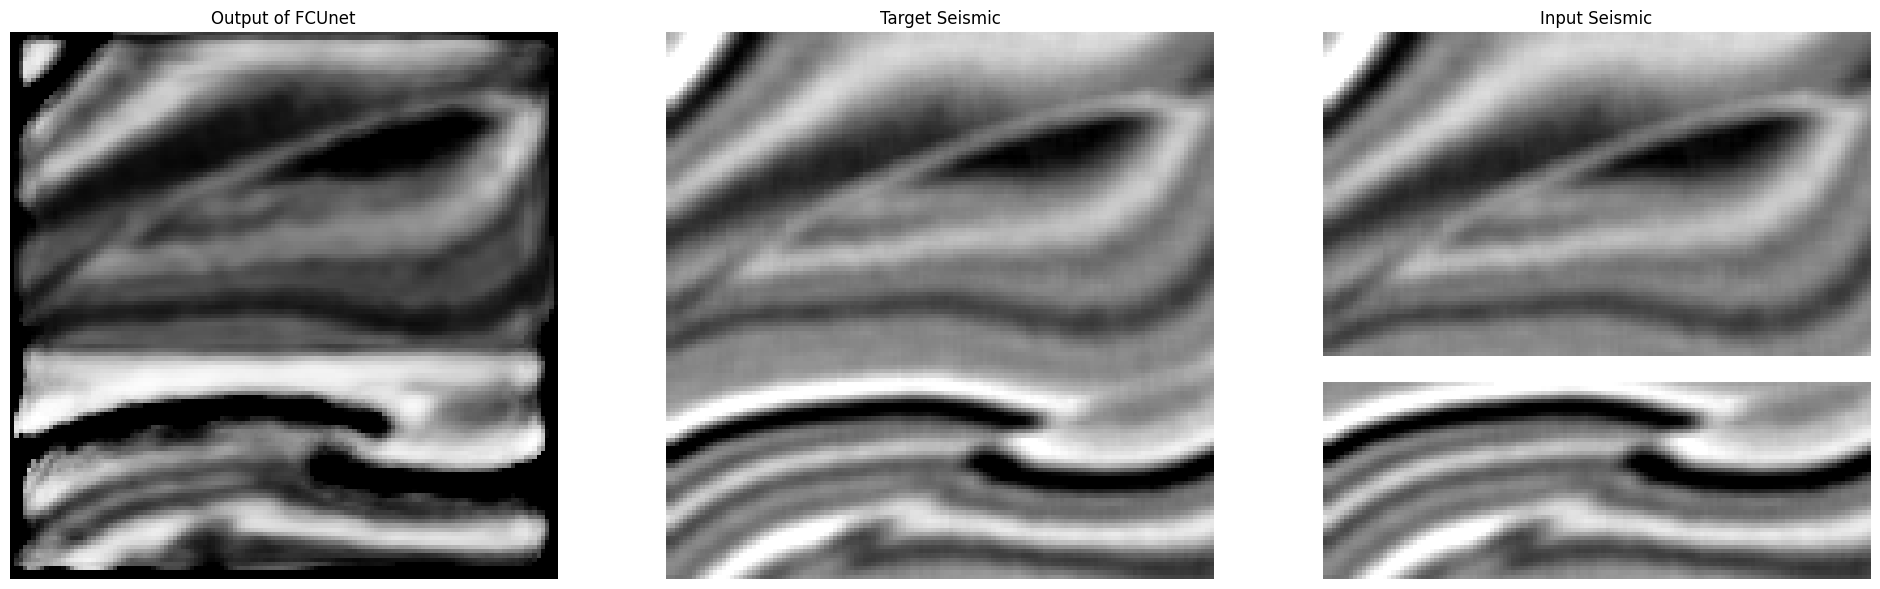

In [41]:
plot_results(dataset[1])

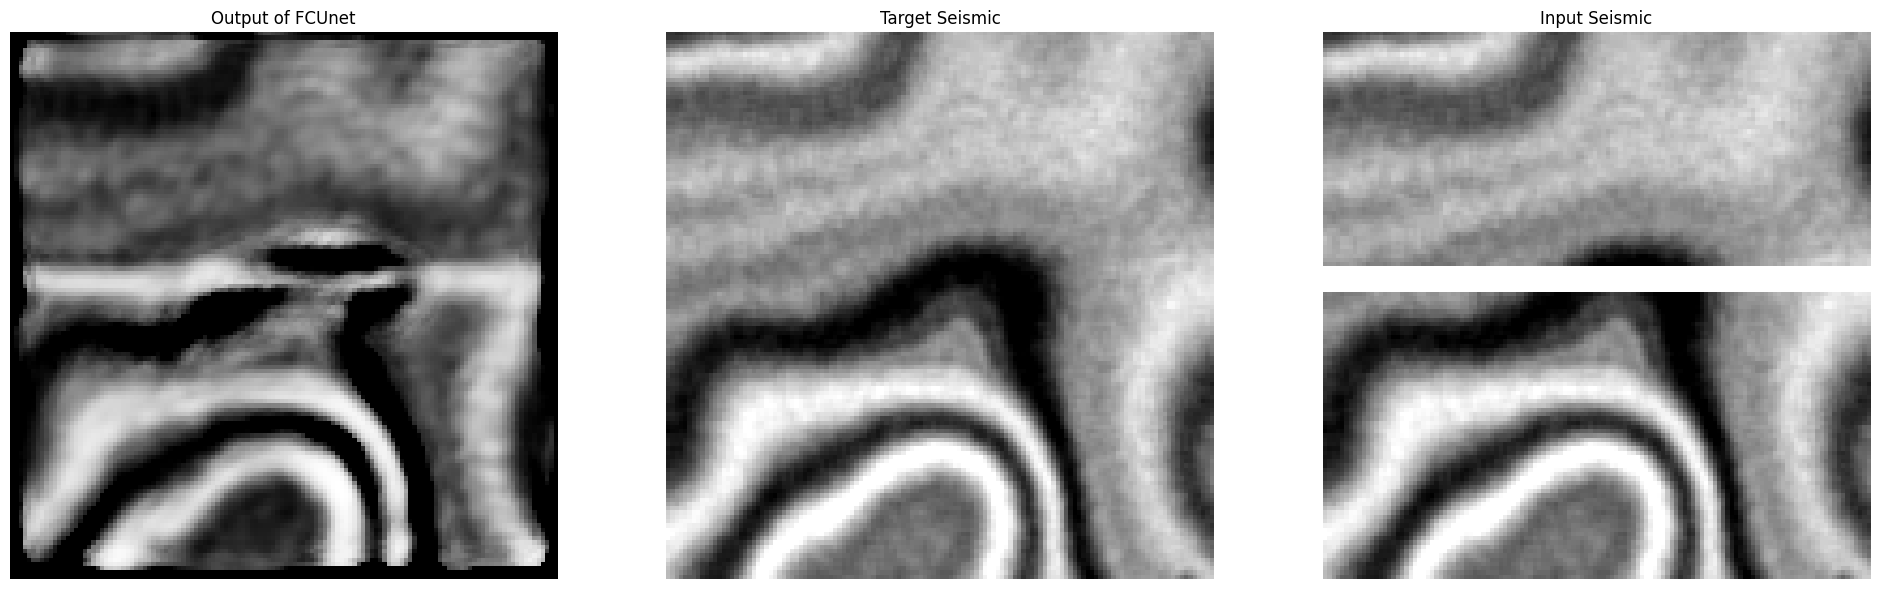

In [42]:
plot_results(dataset[10])

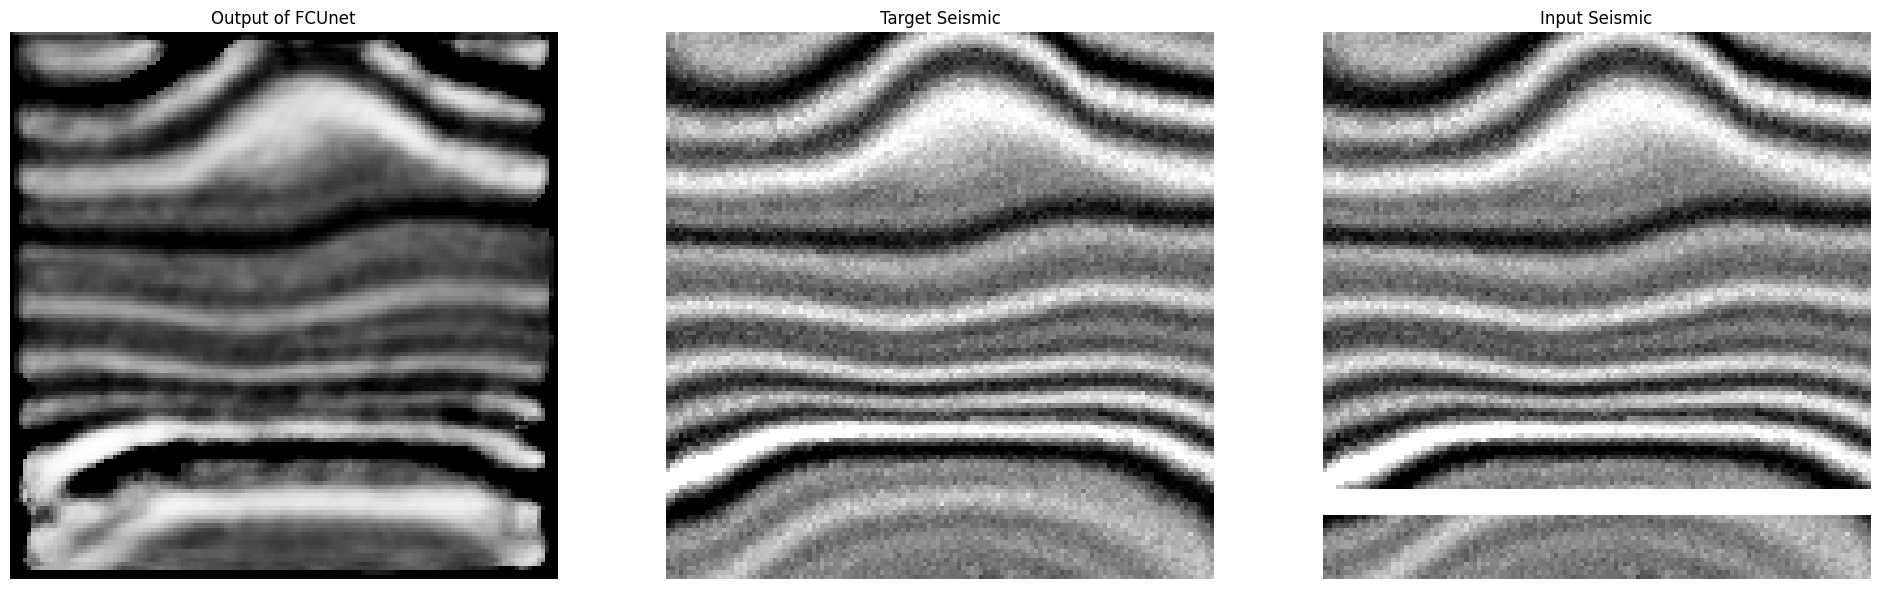

In [43]:
plot_results(dataset[20])

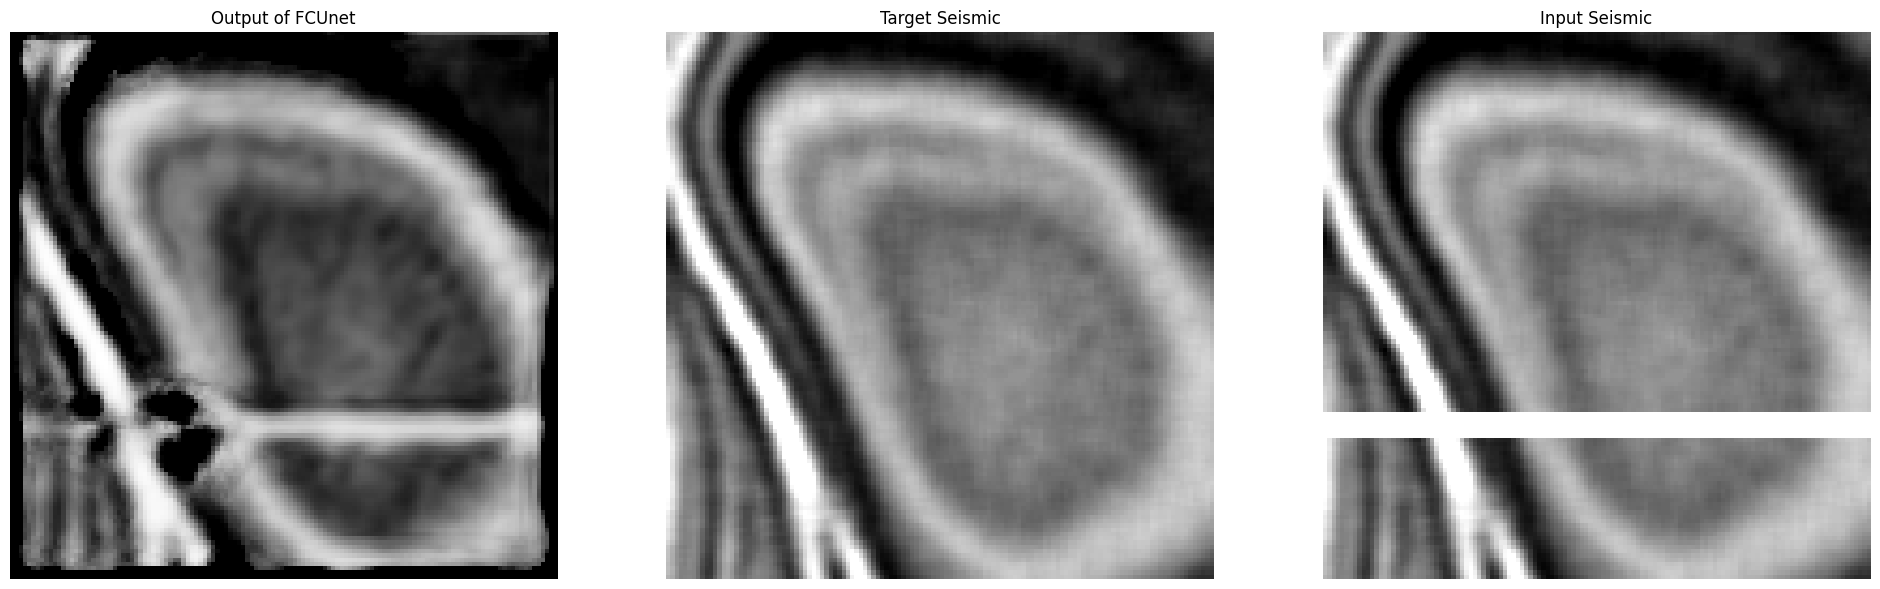

In [44]:
plot_results(dataset[24])